# XGBoost
### Imports

In [7]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

### Create Dataframe

In [8]:
data = pd.read_csv('data/selected_features.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop('price actual', axis=1), data['price actual'], test_size=0.2, random_state=42)

### Hyperparameter Tuning

Mean Squared Error (MSE): 12.985580138288203


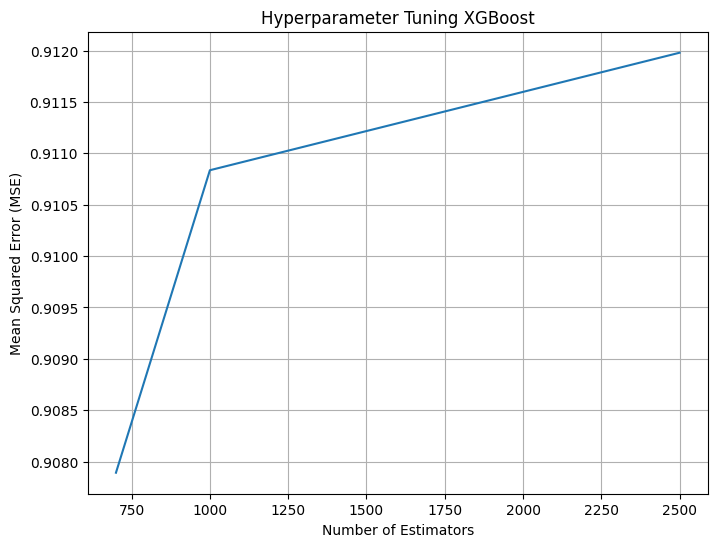

In [9]:
# XGBoost setup and grid search
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = xgb.XGBRegressor()

parameters = {
    "n_estimators": [700, 1000, 2500]
}

grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

param_combinations = grid_search.cv_results_['params']
mse_values = grid_search.cv_results_['mean_test_score']
n_estimators_values = [params['n_estimators'] for params in param_combinations]

# Plot MSE values against n_estimators
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_values, mse_values)
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Hyperparameter Tuning XGBoost')
plt.grid(True)
plt.show()

### Optimal Hyperparameters

Mean Squared Error (MSE): 12.985580138288203


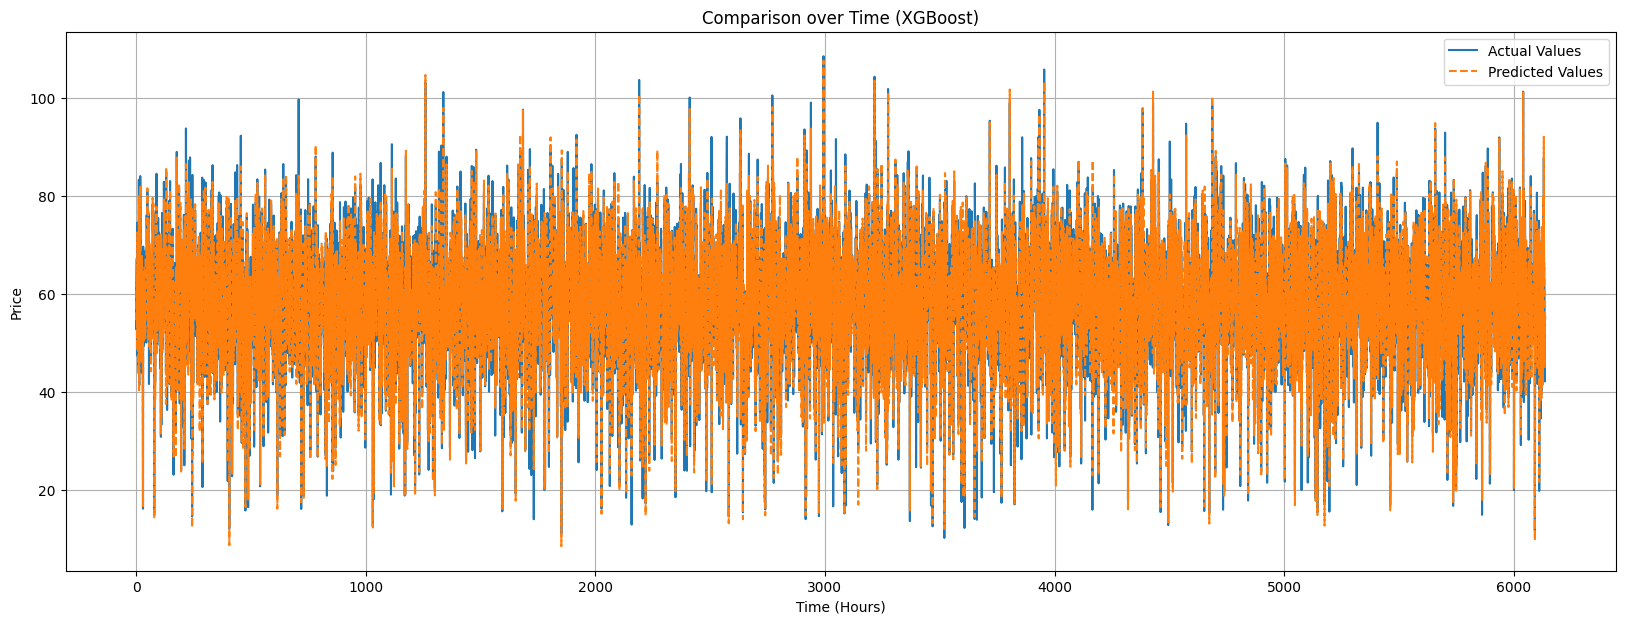

In [10]:
model = xgb.XGBRegressor(n_estimators=2500)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(20, 7))
plt.plot(y_test.reset_index(drop=True), label='Actual Values')
plt.plot(y_pred, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time (Hours)')
plt.ylabel('Price')
plt.title('Comparison over Time (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

### Test Model on OG Data

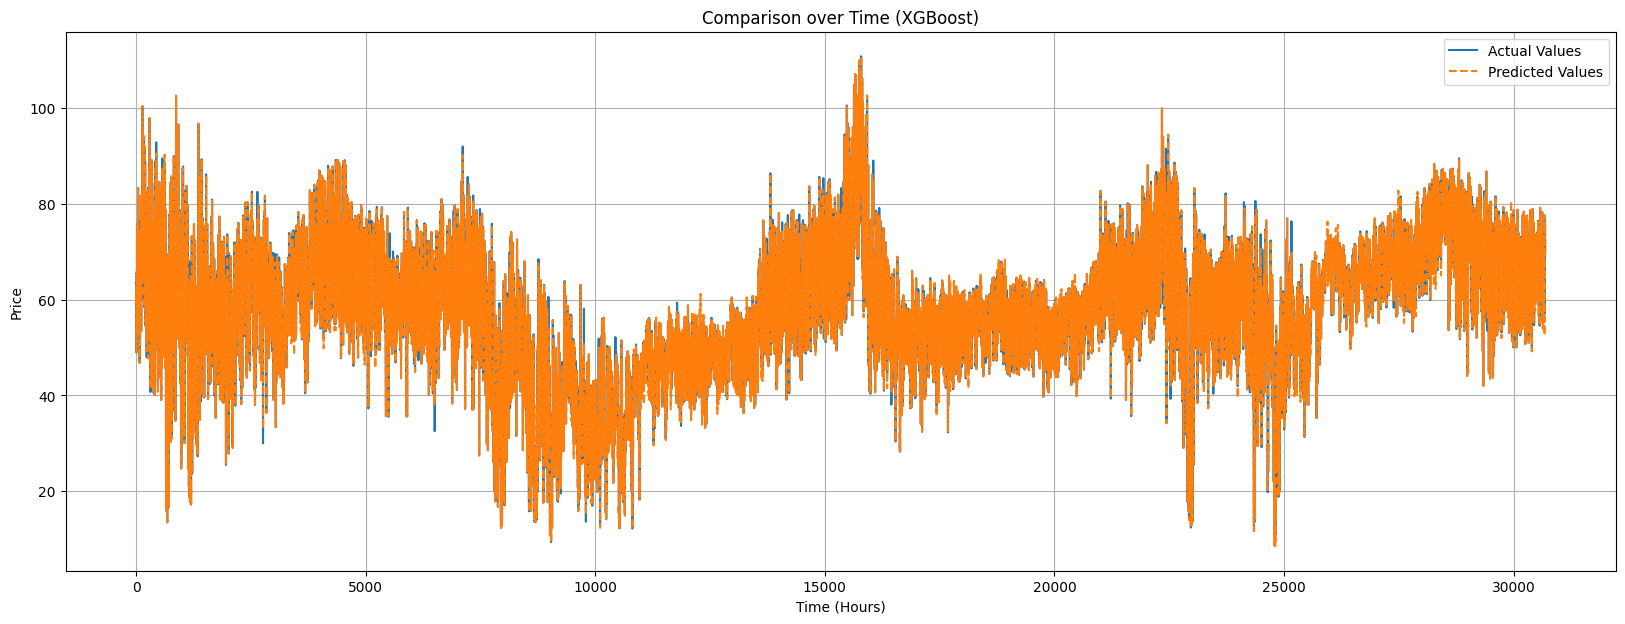

In [11]:
y_pred_total = model.predict(data.drop('price actual', axis=1))

plt.figure(figsize=(20, 7))
plt.plot(data['price actual'], label='Actual Values')
plt.plot(y_pred_total, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time (Hours)')
plt.ylabel('Price')
plt.title('Comparison over Time (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

### Save to CSV

In [12]:
xgb = pd.DataFrame(y_pred)
xgb.to_csv('data/xgb.csv', index=False, header=False)